# Avaliando a cotação do dólar ao longo dos anos

* Neste projeto, utilizaremos um web scraping para pegar informações sobre a cotação do dólar desde 1985 até o tempo presente e calcular seu valor em média ao longo dos anos. Apesar de termos informações desde 1985, vamos considerar apenas os valores de 1995 para frente, visto que o plano real surgiu apenas em meados de 1994.

* Os dados foram extraídos do site da Associação dos Advogados de São Paulo (AASP), eles podem ser conferidos através do seguinte link: https://www.aasp.org.br/suporte-profissional/indices-economicos/mensal/dolar/.

* Vale lembrar que alguns valores podem estar faltando, principalmente os dos meses futuros do ano em que estamos no momento da realização deste projeto(agosto de 2023).

### Importando bibliotecas

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
#Importando o beautiful soup
from urllib.request import urlopen
from bs4 import BeautifulSoup

html = urlopen('https://www.aasp.org.br/suporte-profissional/indices-economicos/mensal/dolar/')
bs = BeautifulSoup(html, 'html.parser')

In [80]:
#Pegando o conteúdo do site. No caso, as linhas da tabela com o ano e os valores do dólar em cada mês
linhas = bs.find_all('table', {'class':'has-fixed-layout'})

In [81]:
#Imprime o texto de cada uma das tags filhas
ano_mes_txt = ''
lista_valores_txt = []

for i in linhas:
    filhas = i.findChildren('tr')
    ano_mes_txt = filhas[0].text
    
    for j in range(1, len(filhas)):
        lista_valores_txt.append(filhas[j].text)

In [82]:
#Lista com os nomes dos meses
lista_meses = ano_mes_txt.split('\n')

#Removendo os elementos vazios no começo e no final, e também o 'Ano/Mês'. Vamos deixar só os meses
lista_meses.remove('')
lista_meses.remove('')
lista_meses.pop(0)

'Ano/Mês'

In [83]:
lista_meses

['Janeiro',
 'Fevereiro',
 'Março',
 'Abril',
 'Maio',
 'Junho',
 'Julho',
 'Agosto',
 'Setembro',
 'Outubro',
 'Novembro',
 'Dezembro']

In [84]:
#Lista com os valores a cada mês ao longo dos anos
lista_valores_mensais = []
for i in range(0, len(lista_valores_txt)):
    lista_valores_mensais.append(lista_valores_txt[i].split('\n'))

lista_valores_mensais

[['',
  '2023',
  '5,3183',
  '5,1146',
  '5,2243',
  '5,2981',
  '4,9455',
  '4,9103',
  '4,8222',
  '',
  '',
  '',
  '',
  '',
  ''],
 ['',
  '2022',
  '5,7127',
  '5,5349',
  '5,1881',
  '5,1314',
  '4,7158',
  '5,1075',
  '5,1119',
  '5,4014',
  '5,0925',
  '5,2211',
  '5,2824',
  '5,3013',
  ''],
 ['',
  '2021',
  '5,0968',
  '5,2714',
  '5,3815',
  '5,6296',
  '5,6234',
  '5,2701',
  '5,0874',
  '5,1000',
  '5,2474',
  '5,2576',
  '5,4510',
  '5,4199',
  ''],
 ['',
  '2020',
  '4,0949',
  '4,1622',
  '4,3163',
  '4,7362',
  '5,2579',
  '5,8229',
  '5,1883',
  '5,3491',
  '5,3852',
  '5,2728',
  '5,6172',
  '5,4854',
  ''],
 ['',
  '2019',
  '3,909',
  '3,7049',
  '3,7155',
  '3,8344',
  '3,8730',
  '4,0031',
  '3,8813',
  '3,7463',
  '4,0188',
  '4,0616',
  '4,1488',
  '4,1831',
  ''],
 ['',
  '2018',
  '3,3182',
  '3,1963',
  '3,2208',
  '3,2859',
  '3,4105',
  '3,6753',
  '3,7738',
  '3,8745',
  '3,9134',
  '4,1879',
  '3,7332',
  '3,7924',
  ''],
 ['',
  '2017',
  '3,3830',
 

In [85]:
#Removendo o item vazio no começo e no final de cada array de elementos
for i in range(0, len(lista_valores_mensais)):
    lista_valores_mensais[i].pop(0)
    lista_valores_mensais[i].pop()
lista_valores_mensais

[['2023',
  '5,3183',
  '5,1146',
  '5,2243',
  '5,2981',
  '4,9455',
  '4,9103',
  '4,8222',
  '',
  '',
  '',
  '',
  ''],
 ['2022',
  '5,7127',
  '5,5349',
  '5,1881',
  '5,1314',
  '4,7158',
  '5,1075',
  '5,1119',
  '5,4014',
  '5,0925',
  '5,2211',
  '5,2824',
  '5,3013'],
 ['2021',
  '5,0968',
  '5,2714',
  '5,3815',
  '5,6296',
  '5,6234',
  '5,2701',
  '5,0874',
  '5,1000',
  '5,2474',
  '5,2576',
  '5,4510',
  '5,4199'],
 ['2020',
  '4,0949',
  '4,1622',
  '4,3163',
  '4,7362',
  '5,2579',
  '5,8229',
  '5,1883',
  '5,3491',
  '5,3852',
  '5,2728',
  '5,6172',
  '5,4854'],
 ['2019',
  '3,909',
  '3,7049',
  '3,7155',
  '3,8344',
  '3,8730',
  '4,0031',
  '3,8813',
  '3,7463',
  '4,0188',
  '4,0616',
  '4,1488',
  '4,1831'],
 ['2018',
  '3,3182',
  '3,1963',
  '3,2208',
  '3,2859',
  '3,4105',
  '3,6753',
  '3,7738',
  '3,8745',
  '3,9134',
  '4,1879',
  '3,7332',
  '3,7924'],
 ['2017',
  '3,3830',
  '3,2034',
  '3,0779',
  '3,1629',
  '3,1269',
  '3,1011',
  '3,2836',
  '3,18

In [86]:
#Agora vamos remover os anos e colocar em uma lista separada
lista_anos = []
for i in range(0, len(lista_valores_mensais)):
    lista_anos.append(lista_valores_mensais[i].pop(0))

In [87]:
#Convertendo os valores para inteiros
lista_anos = [int(ano) for ano in lista_anos]
lista_anos

[2023,
 2022,
 2021,
 2020,
 2019,
 2018,
 2017,
 2016,
 2015,
 2014,
 2013,
 2012,
 2011,
 2010,
 2009,
 2008,
 2007,
 2006,
 2005,
 2004,
 2003,
 2002,
 2001,
 2000,
 1999,
 1998,
 1997,
 1996,
 1995,
 1994,
 1993,
 1992,
 1991,
 1990,
 1989,
 1988,
 1987,
 1986,
 1985]

In [88]:
#Lista dos valores mensais de cada ano com o ano já removido das listas
lista_valores_mensais

[['5,3183',
  '5,1146',
  '5,2243',
  '5,2981',
  '4,9455',
  '4,9103',
  '4,8222',
  '',
  '',
  '',
  '',
  ''],
 ['5,7127',
  '5,5349',
  '5,1881',
  '5,1314',
  '4,7158',
  '5,1075',
  '5,1119',
  '5,4014',
  '5,0925',
  '5,2211',
  '5,2824',
  '5,3013'],
 ['5,0968',
  '5,2714',
  '5,3815',
  '5,6296',
  '5,6234',
  '5,2701',
  '5,0874',
  '5,1000',
  '5,2474',
  '5,2576',
  '5,4510',
  '5,4199'],
 ['4,0949',
  '4,1622',
  '4,3163',
  '4,7362',
  '5,2579',
  '5,8229',
  '5,1883',
  '5,3491',
  '5,3852',
  '5,2728',
  '5,6172',
  '5,4854'],
 ['3,909',
  '3,7049',
  '3,7155',
  '3,8344',
  '3,8730',
  '4,0031',
  '3,8813',
  '3,7463',
  '4,0188',
  '4,0616',
  '4,1488',
  '4,1831'],
 ['3,3182',
  '3,1963',
  '3,2208',
  '3,2859',
  '3,4105',
  '3,6753',
  '3,7738',
  '3,8745',
  '3,9134',
  '4,1879',
  '3,7332',
  '3,7924'],
 ['3,3830',
  '3,2034',
  '3,0779',
  '3,1629',
  '3,1269',
  '3,1011',
  '3,2836',
  '3,1899',
  '3,1976',
  '3,1255',
  '3,1572',
  '3,2834'],
 ['3,8711',
  '3

In [89]:
#A última lista de valores de lista_valores_mensais possui apenas 5 elementos, mas o esperado é 12.
#Vamos preencher esse resto para que não dê problema na hora de criar nosso dataframe

for i in range(0, 7):
    lista_valores_mensais[38].append('')
lista_valores_mensais[38]

['3.318,00',
 '3.802,00',
 '4.161,00',
 '4.680,00',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']

In [90]:
#Consertando os valores para um padrão numérico que o python entende. Depois temos que converter esses
#valores para float.

#Os valores estavam no padrão brasileiro utilizando a vírgula para separar as casas decimais e o ponto
#para separar as unidades. Para deixarmos os dados do jeito que precisamos, temos que inverter isso.

for i in range(0, len(lista_valores_mensais)):
    for j in range(0, len(lista_valores_mensais[i])):
        lista_valores_mensais[i][j] = lista_valores_mensais[i][j].replace('.', '')
        lista_valores_mensais[i][j] = lista_valores_mensais[i][j].replace(',', '.')

In [91]:
lista_valores_mensais

[['5.3183',
  '5.1146',
  '5.2243',
  '5.2981',
  '4.9455',
  '4.9103',
  '4.8222',
  '',
  '',
  '',
  '',
  ''],
 ['5.7127',
  '5.5349',
  '5.1881',
  '5.1314',
  '4.7158',
  '5.1075',
  '5.1119',
  '5.4014',
  '5.0925',
  '5.2211',
  '5.2824',
  '5.3013'],
 ['5.0968',
  '5.2714',
  '5.3815',
  '5.6296',
  '5.6234',
  '5.2701',
  '5.0874',
  '5.1000',
  '5.2474',
  '5.2576',
  '5.4510',
  '5.4199'],
 ['4.0949',
  '4.1622',
  '4.3163',
  '4.7362',
  '5.2579',
  '5.8229',
  '5.1883',
  '5.3491',
  '5.3852',
  '5.2728',
  '5.6172',
  '5.4854'],
 ['3.909',
  '3.7049',
  '3.7155',
  '3.8344',
  '3.8730',
  '4.0031',
  '3.8813',
  '3.7463',
  '4.0188',
  '4.0616',
  '4.1488',
  '4.1831'],
 ['3.3182',
  '3.1963',
  '3.2208',
  '3.2859',
  '3.4105',
  '3.6753',
  '3.7738',
  '3.8745',
  '3.9134',
  '4.1879',
  '3.7332',
  '3.7924'],
 ['3.3830',
  '3.2034',
  '3.0779',
  '3.1629',
  '3.1269',
  '3.1011',
  '3.2836',
  '3.1899',
  '3.1976',
  '3.1255',
  '3.1572',
  '3.2834'],
 ['3.8711',
  '3

In [92]:
#Agora vamos construir o nosso dataframe. Diferente de como se encontra no site, vamos fazer de uma
#forma diferente para facilitar na hora de plotar os gráficos. Vamos ter 3 colunas: ano, mês e valores.

#Criando uma lista de tuplas para os dados
dados = []
for i, ano in enumerate(lista_anos):
    for j, mes in enumerate(lista_meses):
        valor = lista_valores_mensais[i][j]
        dados.append((ano, mes, valor))

#Criando enfim o dataframe
df = pd.DataFrame(dados, columns=['ano', 'mes', 'valores'])

In [93]:
df.head(30)

,ano,mes,valores
0,2023,Janeiro,5.3183
1,2023,Fevereiro,5.1146
2,2023,Março,5.2243
3,2023,Abril,5.2981
4,2023,Maio,4.9455
5,2023,Junho,4.9103
6,2023,Julho,4.8222
7,2023,Agosto,
8,2023,Setembro,
9,2023,Outubro,


In [94]:
#Todos os elementos estão como object, precisamos convertê-los para tipos numéricos.
#Também temos elementos inexistentes que aqui estão identificados como uma string vazia, por isso não
#aparecem como nulos.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ano      468 non-null    int64 
 1   mes      468 non-null    object
 2   valores  468 non-null    object
dtypes: int64(1), object(2)
memory usage: 11.1+ KB


In [95]:
#Convertendo os valores para float e substituindo os valores vazios por NaN
df['valores'] = df['valores'].apply(lambda x: float(x) if x != '' else None)

In [96]:
df.head(30)

,ano,mes,valores
0,2023,Janeiro,5.3183
1,2023,Fevereiro,5.1146
2,2023,Março,5.2243
3,2023,Abril,5.2981
4,2023,Maio,4.9455
5,2023,Junho,4.9103
6,2023,Julho,4.8222
7,2023,Agosto,NaN
8,2023,Setembro,NaN
9,2023,Outubro,NaN


In [97]:
#Agora sim os valores da cotação são do tipo float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 468 entries, 0 to 467
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ano      468 non-null    int64  
 1   mes      468 non-null    object 
 2   valores  455 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.1+ KB


* Analisando o dataframe df, pudemos notar que o valor de agosto de 2006 veio inicialmente com a casa decimal separada por ponto e não por vírgula como os demais. Ao conferir os dados originais no site, esse erro já estava lá. Então, na hora em que estávamos limpando a lista de valores mensais, não percebemos esse erro. Mas como é o único valor apresentando esse problema, vamos substituí-lo manualmente pelo valor correto.

In [98]:
#Aqui estamos substituindo o valor errado pelo certo direto no dataframe
indice_agosto_2006 = df.loc[(df['ano'] == 2006) & (df['mes'] == 'Agosto')].index[0]
df.loc[indice_agosto_2006, 'valores'] = 2.1480

In [99]:
df.loc[(df['ano'] == 2006) & (df['mes'] == 'Agosto')]

,ano,mes,valores
211,2006,Agosto,2.148


### Criando um novo dataframe a partir de 1995

In [100]:
#Como o plano real só surgiu em julho de 1994, vamos considerar os valores de 1995 para frente justamente
#para considerarmos apenas o real. Portanto, vamos criar um novo dataframe

df_real = df[df['ano'] >= 1995]
df_real.head(20)

,ano,mes,valores
0,2023,Janeiro,5.3183
1,2023,Fevereiro,5.1146
2,2023,Março,5.2243
3,2023,Abril,5.2981
4,2023,Maio,4.9455
5,2023,Junho,4.9103
6,2023,Julho,4.8222
7,2023,Agosto,NaN
8,2023,Setembro,NaN
9,2023,Outubro,NaN


In [101]:
df_real.tail(20)

,ano,mes,valores
328,1996,Maio,0.9957
329,1996,Junho,1.0015
330,1996,Julho,1.0062
331,1996,Agosto,1.0122
332,1996,Setembro,1.0192
333,1996,Outubro,1.0251
334,1996,Novembro,1.0305
335,1996,Dezembro,1.0389
336,1995,Janeiro,0.8470
337,1995,Fevereiro,0.8370


In [102]:
df_real.shape

(348, 3)

In [103]:
#Só há 5 valores vazios que são justamente os meses de 2023 que ainda não ocorreram e, portanto, não 
#temos informações sobre eles. De toda forma, essa ausência não terá impacto significativo no cálculo
#da média do valor do dólar para 2023.
df_real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ano      348 non-null    int64  
 1   mes      348 non-null    object 
 2   valores  343 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 10.9+ KB


### Analisando a média em cada ano

In [104]:
df_real_medias_ano = df_real[['ano', 'valores']].groupby('ano').mean().reset_index()
df_real_medias_ano.rename(columns={'valores':'media'}, inplace=True)
df_real_medias_ano

,ano,media
0,1995,0.915200
1,1996,1.005598
2,1997,1.077758
3,1998,1.160233
4,1999,1.808458
5,2000,1.833075
6,2001,2.363708
7,2002,2.930700
8,2003,3.057600
9,2004,2.927200


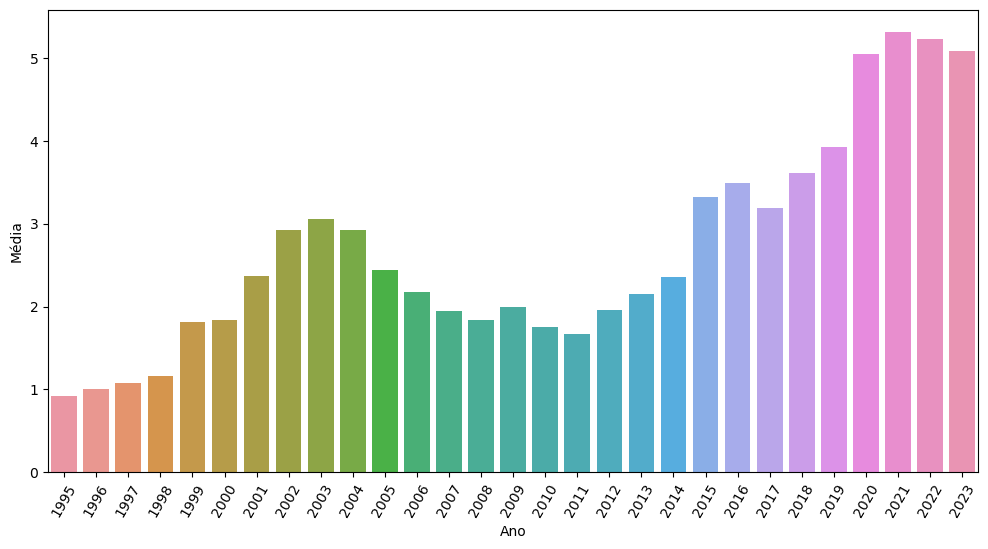

In [105]:
#Visualizando graficamente
fig = plt.figure(figsize=(12, 6))
sns.barplot(x='ano', y='media', data=df_real_medias_ano)
plt.xlabel('Ano')
plt.ylabel('Média')
plt.xticks(rotation=60);